# Project - Airline Sentiment Analysis
---------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------

# Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords,wordnet
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
import warnings
warnings.filterwarnings("ignore")

# Dataset: Airline sentiment

A dataset for US airlines comments analysis,Tweets analysis on Kaggle (<a href="https://www.kaggle.com/datasets/welkin10/airline-sentiment">See dataset page</a>)

### About Dataset
#### Context:
    - This is US airlines data which contain comments of passengers on basis of service provided by airlines.
--------------------------------------------------------------------------------
#### Inspiration:
    -you can use it for sentiment analysis .
---------------------------------------------------------------------------------

# Importing Dataset

In [2]:
dataset=pd.read_csv('Dataset/airline data.csv')
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [48]:
dataset.shape

(14640, 15)

In [3]:
print(len(dataset.columns))
dataset.columns

15


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [13]:
dataset['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [4]:
dataset.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [12]:
dataset.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


# check missing value 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

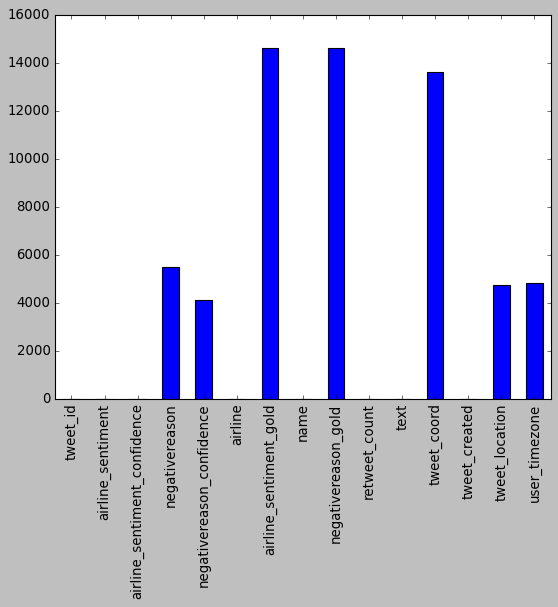

In [11]:
plt.style.use('classic')
dataset.isnull().sum(axis=0).plot.bar()
plt.show()

# Graphical representation of airline sentiment :-

In [22]:
dataset['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

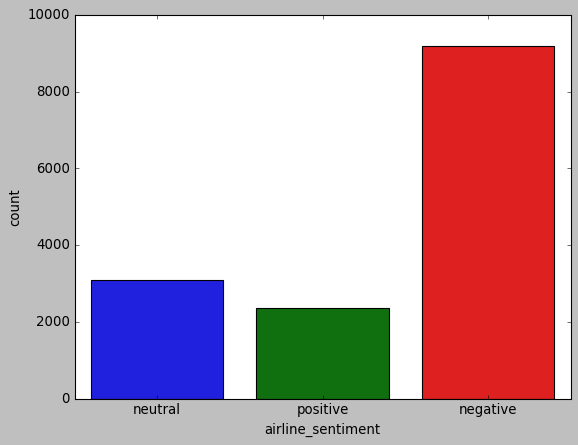

In [20]:
sns.countplot(x='airline_sentiment',data=dataset,order=['neutral','positive','negative'])
plt.show()

# Graphical representation of airline sentiment with airlines:-

In [23]:
dataset['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

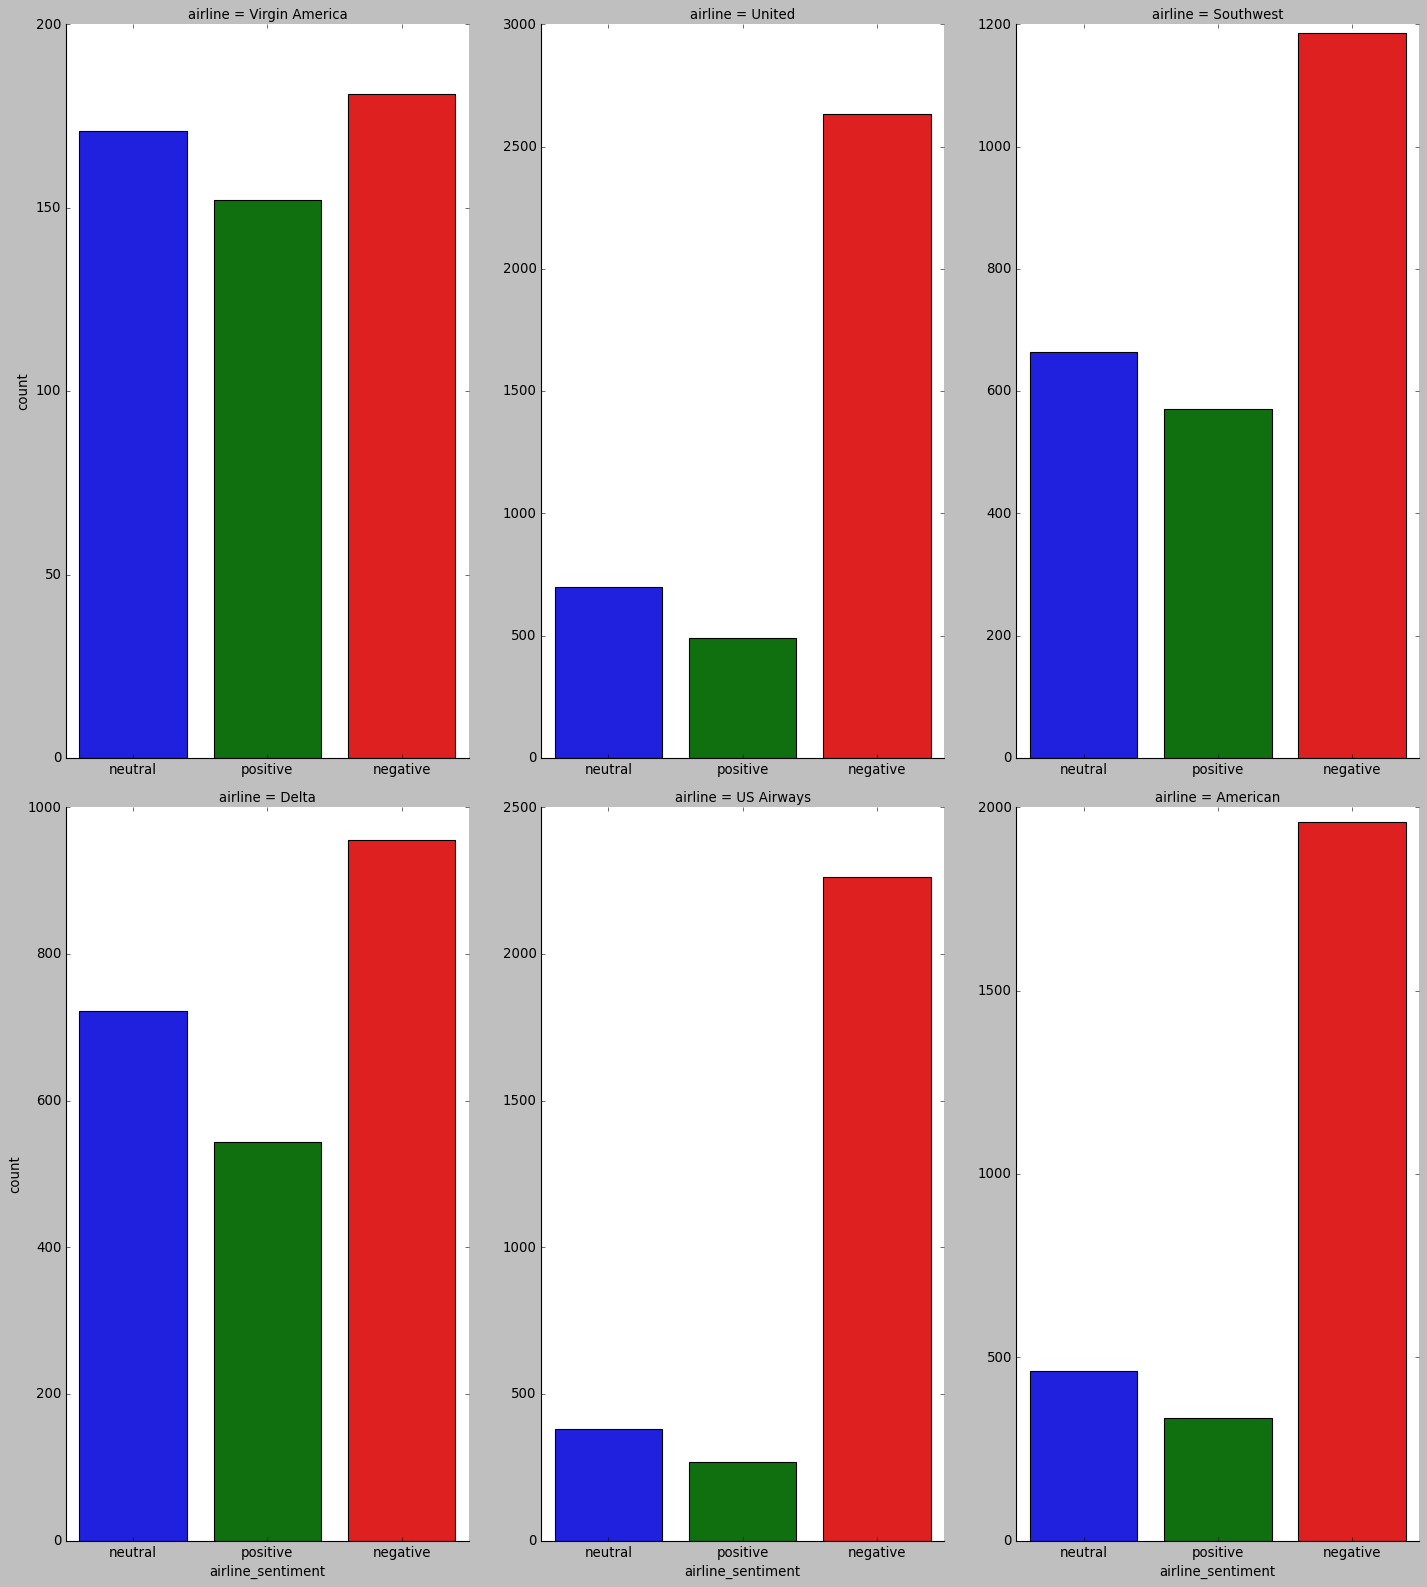

In [28]:
sns.factorplot(x = 'airline_sentiment',data=dataset,
               order = ['neutral','positive','negative'],kind = 'count',col_wrap=3,col='airline',size=10,aspect=0.6,sharex=False,sharey=False)
plt.show()

# Graphical representation of negativereason towards airlines:-

In [29]:
dataset['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

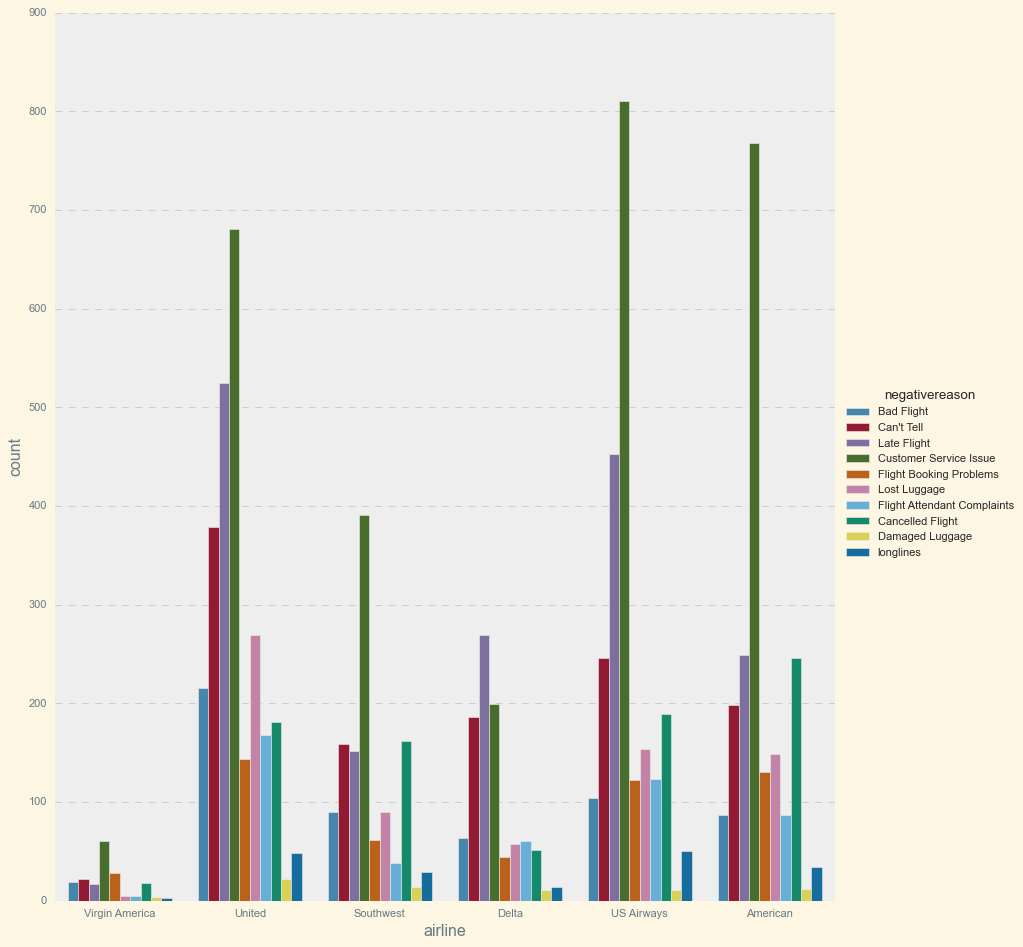

In [40]:
plt.style.use('bmh')
sns.factorplot(x = 'airline',data = dataset,kind = 'count',hue='negativereason',size=12,aspect=.9)
plt.show()

# Data Cleaning and Preprocessing :-

In [42]:
text=dataset['text'].values
text=[word_tokenize(doc) for doc in text]

In [43]:
for i in range(10):
    print(text[i])

['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
['@', 'VirginAmerica', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']
['@', 'VirginAmerica', 'I', 'did', "n't", 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']
['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse']
['@', 'VirginAmerica', 'and', 'it', "'s", 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']
['@', 'VirginAmerica', 'seriously', 'would', 'pay', '$', '30', 'a', 'flight', 'for', 'seats', 'that', 'did', "n't", 'have', 'this', 'playing', '.', 'it', "'s", 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA']
['@', 'VirginAmerica', 'yes', ',', 'nearly', 'every', 'time', 'I', 'fly', 'VX', 'this', '“', 'ear', 'worm', '”', 'won', '’', 't', 'go', 'away', ':', ')']
['@', 'Virgin

In [46]:
sentiment=dataset['airline_sentiment'].values #'neutral' 'positive' 'negative'

In [50]:
for i in range(10):
    print(sentiment[i])

neutral
positive
neutral
negative
negative
negative
positive
neutral
positive
positive


In [47]:
documents=[(text[i],sentiment[i]) for i in range(dataset.shape[0] #rows)]

In [49]:
for i in range(10):
    print(documents[i])

(['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'], 'neutral')
(['@', 'VirginAmerica', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.'], 'positive')
(['@', 'VirginAmerica', 'I', 'did', "n't", 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!'], 'neutral')
(['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse'], 'negative')
(['@', 'VirginAmerica', 'and', 'it', "'s", 'a', 'really', 'big', 'bad', 'thing', 'about', 'it'], 'negative')
(['@', 'VirginAmerica', 'seriously', 'would', 'pay', '$', '30', 'a', 'flight', 'for', 'seats', 'that', 'did', "n't", 'have', 'this', 'playing', '.', 'it', "'s", 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA'], 'negative')
(['@', 'VirginAmerica', 'yes', ',', 'nearly', 'every', 'time', 'I', 'fly', 'VX', 'thi

# Dataset Preprocessing
1. TOKENIZING
2. LEMMATIZING
3. REMOVING STOPWORDS
4. PUNCTUATIONS

In [52]:
stops=set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [53]:
def get_simple_pos(tag):   
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [54]:
lemmatizer=WordNetLemmatizer()

In [55]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [56]:
clean_document = [(clean_review(doc), category) for doc, category in documents]

In [64]:
print("The clean dataset is \n")

for i in range(10):
    print(clean_document[i])

The clean dataset is 

(['virginamerica', 'dhepburn', 'say'], 'neutral')
(['virginamerica', 'plus', "'ve", 'add', 'commercial', 'experience', '...', 'tacky'], 'positive')
(['virginamerica', "n't", 'today', '...', 'must', 'mean', 'need', 'take', 'another', 'trip'], 'neutral')
(['virginamerica', "'s", 'really', 'aggressive', 'blast', 'obnoxious', '``', 'entertainment', "''", 'guest', 'face', 'amp', 'little', 'recourse'], 'negative')
(['virginamerica', "'s", 'really', 'big', 'bad', 'thing'], 'negative')
(['virginamerica', 'seriously', 'would', 'pay', '30', 'flight', 'seat', "n't", 'play', "'s", 'really', 'bad', 'thing', 'fly', 'va'], 'negative')
(['virginamerica', 'yes', 'nearly', 'every', 'time', 'fly', 'vx', '“', 'ear', 'worm', '”', '’', 'go', 'away'], 'positive')
(['virginamerica', 'really', 'miss', 'prime', 'opportunity', 'men', 'without', 'hats', 'parody', 'http', '//t.co/mwpg7grezp'], 'neutral')
(['virginamerica', 'well', "didn't…but", '-d'], 'positive')
(['virginamerica', 'amaze', 

In [65]:
categories = [category for document, category in clean_document]

In [66]:
categories[:10]

['neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive']

In [67]:
text_documents = [" ".join(document) for document, category in clean_document]

In [68]:
for i in range(10):
    print(text_documents[i])

virginamerica dhepburn say
virginamerica plus 've add commercial experience ... tacky
virginamerica n't today ... must mean need take another trip
virginamerica 's really aggressive blast obnoxious `` entertainment '' guest face amp little recourse
virginamerica 's really big bad thing
virginamerica seriously would pay 30 flight seat n't play 's really bad thing fly va
virginamerica yes nearly every time fly vx “ ear worm ” ’ go away
virginamerica really miss prime opportunity men without hats parody http //t.co/mwpg7grezp
virginamerica well didn't…but -d
virginamerica amaze arrive hour early 're good


# SPLITTING THE DATASET

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_documents, categories,test_size=0.3,random_state=0)

# Vectorization to get the maximum number of frequency words

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
count_vect=TfidfVectorizer(max_features=30000)
X_train_features=count_vect.fit_transform(X_train)
X_test_features=count_vect.transform(X_test)

In [25]:
import pickle

with open('tfidf.pickle', 'wb') as f:
    pickle.dump(count_vect, f)

# Helper funcation

In [74]:
from sklearn.metrics import accuracy_score
def eval_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    print(model.__class__.__name__)
    print('acc train:', acc_train)
    print('acc test:', acc_test)
    print('----------------------------')
    
    return(acc_train,acc_test)

# USING Svm CLASSIFIER

In [75]:
clf = SVC(degree=11)
acc_tarin , acc_test = eval_model(clf,X_train_features,y_train,X_test_features,y_test)

SVC
acc train: 0.9585284933645589
acc test: 0.7789162112932605
----------------------------


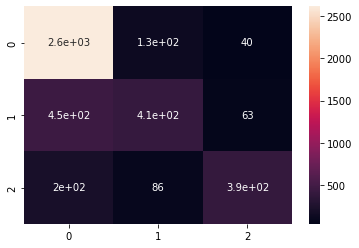

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
y_pred=clf.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()


# USING RANDOM FOREST CLASSIFIER 

In [76]:
clf1=RandomForestClassifier(n_estimators=100, n_jobs=-1)
acc_tarin1,acc_test1=eval_model(clf1,X_train_features,y_train,X_test_features,y_test)
 

RandomForestClassifier
acc train: 0.9959992193598751
acc test: 0.7536429872495446
----------------------------


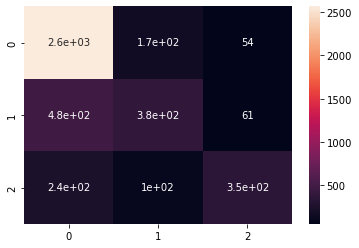

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
y_pred1=clf1.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True)
plt.show()


# USING KNeighborsClassifier 

In [77]:
clf2=KNeighborsClassifier(n_neighbors=57)
acc_tarin2,acc_test2=eval_model(clf2,X_train_features,y_train,X_test_features,y_test)

KNeighborsClassifier
acc train: 0.7379000780640125
acc test: 0.7454462659380692
----------------------------


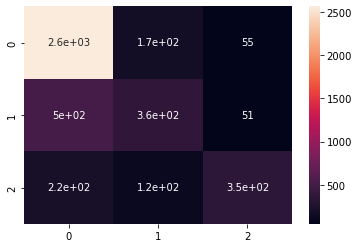

In [32]:
y_pred2=clf2.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True)
plt.show()


# USING BernoulliNB Classifier

In [33]:
clf3=BernoulliNB()
acc_tarin3,acc_test3=eval_model(clf3,X_train_features,y_train,X_test_features,y_test)


BernoulliNB
acc train: 0.8033762685402029
acc test: 0.7607012750455373
----------------------------


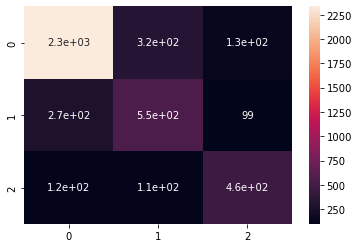

In [34]:
y_pred3=clf3.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True)
plt.show()


# USING LogisticRegression

In [35]:
clf4=LogisticRegression(max_iter=100,random_state=0)
acc_tarin4,acc_test4=eval_model(clf4,X_train_features,y_train,X_test_features,y_test)

LogisticRegression
acc train: 0.8291373926619828
acc test: 0.7841530054644809
----------------------------


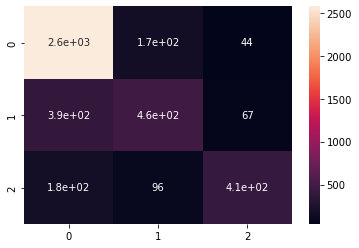

In [36]:
y_pred4=clf4.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred4)
sns.heatmap(cm,annot=True)
plt.show()


# USING MultinomialNB Classifier

In [37]:
clf5=MultinomialNB()
acc_tarin5,acc_test5=eval_model(clf5,X_train_features,y_train,X_test_features,y_test)

MultinomialNB
acc train: 0.773224043715847
acc test: 0.75591985428051
----------------------------


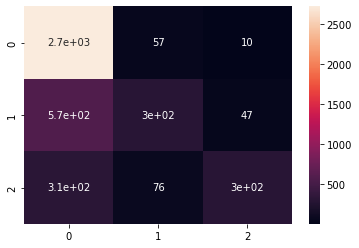

In [38]:
y_pred5=clf5.predict(X_test_features)
cm=confusion_matrix(y_test,y_pred5)
sns.heatmap(cm,annot=True)
plt.show()


# Making Voting to five Models

In [39]:
estimators = [
    ('Svm',clf),
    ('RANDOM FOREST', clf1),
    ('KNN', clf2),
    ('BernoulliNB', clf3),
    ('LogisticRegression',clf4),
    ('MultinomialNB',clf5)
]

voting_clf = VotingClassifier(estimators)

In [40]:
all_estimators = estimators + [('voting', voting_clf)]

final_results = {
    'model': [],
    'acc train': [],
    'acc test': []
}

for (name, clf) in all_estimators:
    acc_train, acc_test = eval_model(
        clf, X_train_features,y_train,X_test_features,y_test
    )
    final_results['model'].append(name)
    final_results['acc train'].append(acc_train)
    final_results['acc test'].append(acc_test)

SVC
acc train: 0.927400468384075
acc test: 0.7786885245901639
----------------------------
RandomForestClassifier
acc train: 0.9917056986729118
acc test: 0.7547814207650273
----------------------------
KNeighborsClassifier
acc train: 0.750975800156128
acc test: 0.7461293260473588
----------------------------
BernoulliNB
acc train: 0.8033762685402029
acc test: 0.7607012750455373
----------------------------
LogisticRegression
acc train: 0.8291373926619828
acc test: 0.7841530054644809
----------------------------
MultinomialNB
acc train: 0.773224043715847
acc test: 0.75591985428051
----------------------------
VotingClassifier
acc train: 0.8564597970335676
acc test: 0.7729963570127505
----------------------------


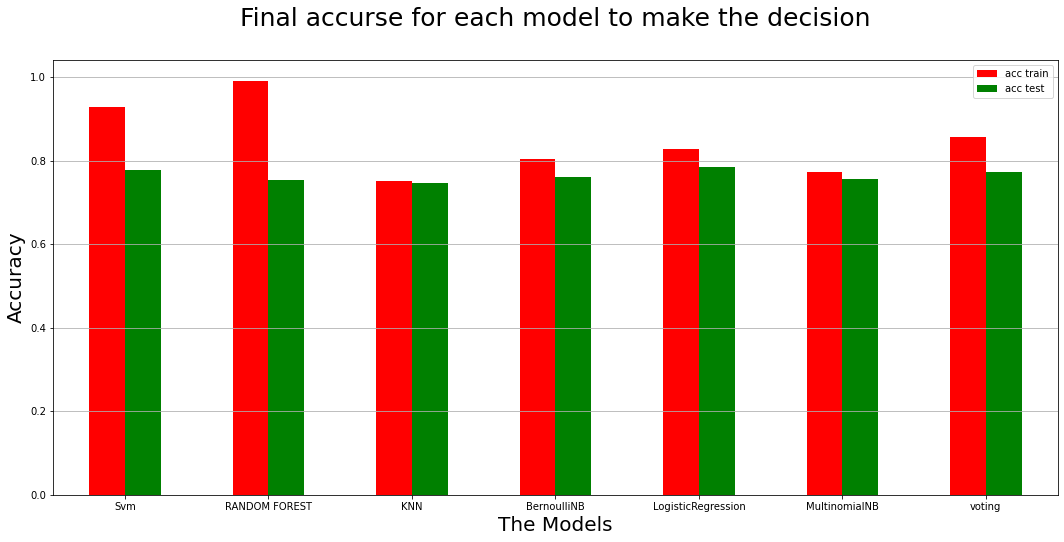

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

final_results=pd.DataFrame(final_results)
final_results.plot.bar(x='model',y=['acc train','acc test'],color=['red','green'],
                       figsize=(18,8),width=0.5)
plt.xticks(rotation=360)
plt.title('Final accurse for each model to make the decision\n',fontsize=25)
plt.xlabel('The Models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()

In [42]:
final_results.sort_values(by='acc test', ascending=False, ignore_index=True, inplace=True)
final_results

,model,acc train,acc test
0,LogisticRegression,0.829137,0.784153
1,Svm,0.927400,0.778689
2,voting,0.856460,0.772996
3,BernoulliNB,0.803376,0.760701
4,MultinomialNB,0.773224,0.755920
5,RANDOM FOREST,0.991706,0.754781
6,KNN,0.750976,0.746129


# Final Test

In [43]:
final_model=LogisticRegression(max_iter=100,random_state=0)
final_model.fit(X_train_features,y_train)
final_y_pred=final_model.predict(X_test_features)
final_acc_test=accuracy_score(y_test,final_y_pred)
print("the Final Accurse:",round(final_acc_test,2)*100,"%")

the Final Accurse: 78.0 %


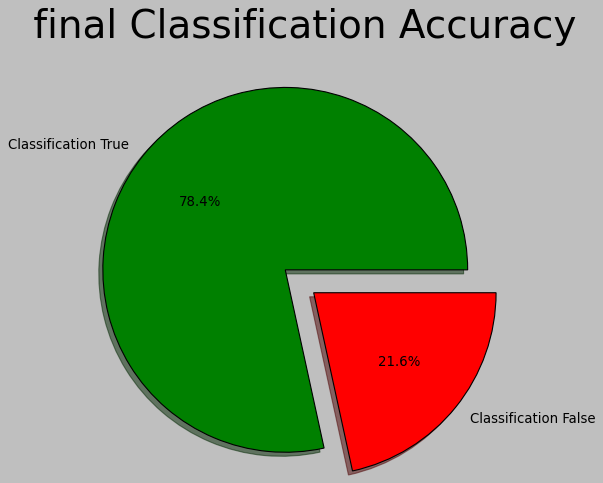

In [44]:
plt.style.use('classic')
plt.pie([final_acc_test,1-final_acc_test],labels=('Classification True','Classification False')
        ,explode=[0.1,0.1],autopct="%1.1f%%",shadow=True,colors=['green','red'])
plt.axis('equal')
plt.title(' final Classification Accuracy\n',fontsize=35)
plt.show()

# Save Model

In [45]:
import pickle
with open('saved-model.pickle', 'wb') as f:
    pickle.dump(final_model, f)

# Check The Model After Load

In [46]:
import pickle

with open('saved-model.pickle', 'rb') as f:
    my_model = pickle.load(f)
    
with open('tfidf.pickle', 'rb') as f:
    my_feature = pickle.load(f)

In [57]:
randnum=np.random.randint(1,1000)
sentence=X_test[randnum]
print(sentence)
sentence_features=X_test_features[randnum]
print("-----------------------------------------------------------------------")
print("the actual Sentiment Analysis:===>>",y_test[randnum])
print("-----------------------------------------------------------------------")
# in matrix form
print('tf-idf values:')
print(sentence_features)
print("-----------------------------------------------------------------------")
print('my model predict:===>>',final_y_pred[randnum])
print("-----------------------------------------------------------------------")

usairways try change flight airline travel advisory hold 45 min help
-----------------------------------------------------------------------
the actual Sentiment Analysis:===>> negative
-----------------------------------------------------------------------
tf-idf values:
  (0, 31)	0.3903623381365458
  (0, 57)	0.4707697439563525
  (0, 65)	0.2819026850286404
  (0, 206)	0.29500263846528896
  (0, 428)	0.1513820651529059
  (0, 512)	0.2413844986312262
  (0, 518)	0.26456932648822234
  (0, 676)	0.31593028234332565
  (0, 1059)	0.31593028234332565
  (0, 1070)	0.28356560278694437
  (0, 1102)	0.16817889456519827
-----------------------------------------------------------------------
my model predict:===>> negative
-----------------------------------------------------------------------


# ♥♥ End of Code ♥♥